In [2]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import seaborn as sns
#import plotly.express as px

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [3]:
#!pip install plotly_express

In [4]:
#############  AIRLINE DELAY ##################
delays = "airline_delay_causes.csv"
delays_df = pd.read_csv(delays)
delays_df.dtypes



C:\Users\ZLeisure\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning:

Columns (6,10,11,12,16,18,19,20,21,22,25) have mixed types. Specify dtype option on import or set low_memory=False.



year                    float64
 month                  float64
carrier                  object
carrier_name             object
airport                  object
airport_name             object
arr_flights              object
arr_del15               float64
carrier_ct              float64
 weather_ct             float64
nas_ct                   object
security_ct              object
late_aircraft_ct         object
arr_cancelled           float64
arr_diverted            float64
num_total_delays        float64
percent_on_time          object
 arr_delay              float64
 carrier_delay           object
weather_delay            object
nas_delay                object
security_delay           object
late_aircraft_delay      object
Unnamed: 23             float64
delay_sum               float64
avg_delay_per_flight     object
dtype: object

In [6]:
#delays_df["avg_delay_per_flight"] = delays_df.avg_delay_per_flight.astype(float)
delays_df["avg_delay_per_flight"] = pd.to_numeric(delays_df.avg_delay_per_flight, errors='coerce')
delays_df.dtypes

year                    float64
 month                  float64
carrier                  object
carrier_name             object
airport                  object
airport_name             object
arr_flights              object
arr_del15               float64
carrier_ct              float64
 weather_ct             float64
nas_ct                   object
security_ct              object
late_aircraft_ct         object
arr_cancelled           float64
arr_diverted            float64
num_total_delays        float64
percent_on_time          object
 arr_delay              float64
 carrier_delay           object
weather_delay            object
nas_delay                object
security_delay           object
late_aircraft_delay      object
Unnamed: 23             float64
delay_sum               float64
avg_delay_per_flight    float64
dtype: object

In [118]:
#### filter by 2015   ####
delays_df_2015 = delays_df[delays_df.year==2015]
#print(delays_df_2015.shape)
#delays_df_2015
#pd.pivot_table(df, values='D', index=['A', 'B'],
#...                     columns=['C'], aggfunc=np.sum)
#delays_df_2015
z = pd.pivot_table(delays_df_2015, values="delay_sum", index=["carrier_name"], aggfunc=np.sum)
# zyab = pd.pivot_table(delays_df_2015, values="arr_flights", index=["carrier_name"], aggfunc=np.sum)
# zyab

# z['result'] = z['delay_sum']/zyab['arr_flights']
# z
#### groupby airline  ####
#x = delays_df_2015.groupby(["carrier_name"]).delay_sum.sum()    #[["delay_sum", "avg_delay_per_flight"]].sum()
#x.reset_index()
#x

In [119]:
#zyx = z.reset_index()
#zyx2 = z["carrier_name"]
#zyx = z.iloc[1,2,9,11,12,13]
#zyx
delays_only_6 = z.reset_index()
delays_only_6 = z.iloc[[1,2,9,11,12,13]]
delays_only_6

,delay_sum
carrier_name,
American Airlines Inc.,15662870.0
Delta Air Lines Inc.,14459782.0
Southwest Airlines Co.,24742768.0
US Airways Inc.,3676130.0
United Air Lines Inc.,13551612.0
Virgin America,1326234.0


<IPython.core.display.Javascript object>


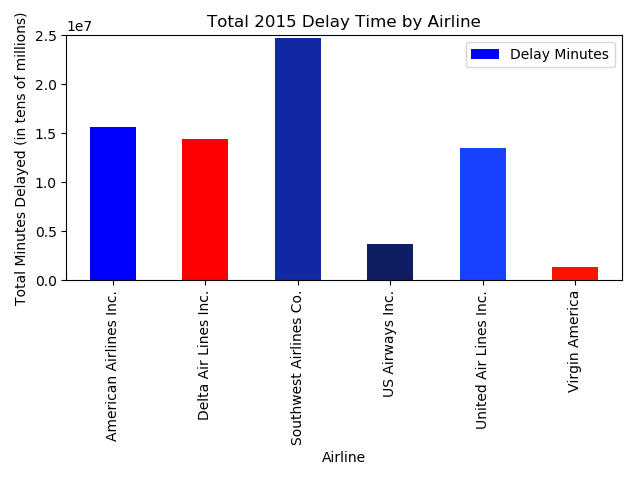

In [9]:
%matplotlib notebook
delays6_plot = delays_only_6.plot.bar(y='delay_sum', rot=0, color=['blue', 'red', '#0F29A2', '#0F1E62', '#1841FF','#FF1300'])
plt.xticks(rotation='vertical')
plt.title("Total 2015 Delay Time by Airline")
plt.xlabel("Airline")
plt.ylabel("Total Minutes Delayed (in tens of millions)")
plt.ylim(0, 25000000)
L=plt.legend()
L.get_texts()[0].set_text('Delay Minutes')
plt.tight_layout()
plt.savefig("Images/total_delays_6.png")
plt.show()

<IPython.core.display.Javascript object>


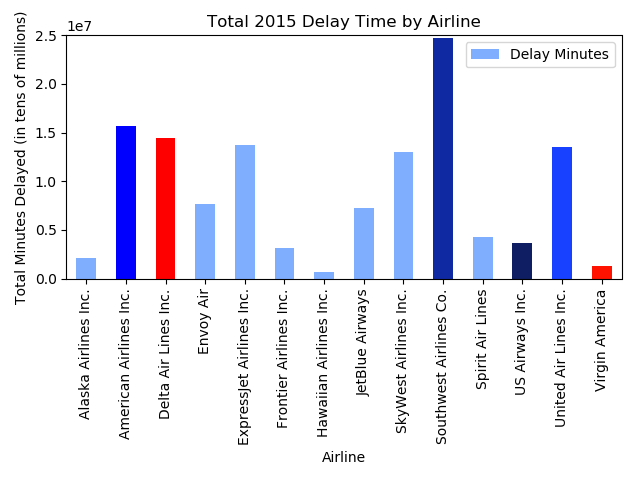

In [10]:
%matplotlib notebook
delays_all_plot = z.plot.bar(y='delay_sum', rot=0, color=['#80AEFF','blue', 'red', '#80AEFF','#80AEFF', '#80AEFF','#80AEFF', '#80AEFF','#80AEFF','#0F29A2', '#80AEFF','#0F1E62', '#1841FF','#FF1300'])
plt.xticks(rotation='vertical')
plt.title("Total 2015 Delay Time by Airline")
plt.xlabel("Airline")
plt.ylabel("Total Minutes Delayed (in tens of millions)")
plt.ylim(0, 25000000)
L=plt.legend()
L.get_texts()[0].set_text('Delay Minutes')
plt.tight_layout()
plt.savefig("Images/total_delays_all.png")
plt.show()

In [12]:
zy = pd.pivot_table(delays_df_2015, values="avg_delay_per_flight", index=["carrier_name"], aggfunc=np.mean)
zy

,avg_delay_per_flight
carrier_name,
Alaska Airlines Inc.,12.142025
American Airlines Inc.,21.940765
Delta Air Lines Inc.,15.432086
Envoy Air,22.879403
ExpressJet Airlines Inc.,22.458894
Frontier Airlines Inc.,31.296117
Hawaiian Airlines Inc.,14.177571
JetBlue Airways,24.904244
SkyWest Airlines Inc.,21.060413


<IPython.core.display.Javascript object>


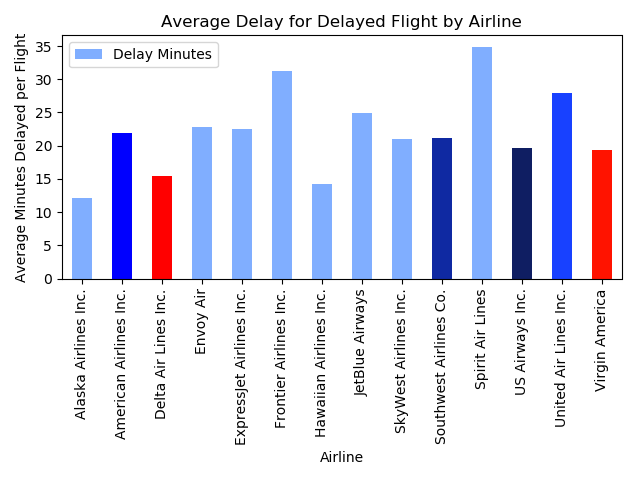

In [13]:
%matplotlib notebook
avg_delay = zy.plot.bar(y='avg_delay_per_flight', rot=0, color=['#80AEFF','blue', 'red', '#80AEFF','#80AEFF', '#80AEFF','#80AEFF', '#80AEFF','#80AEFF','#0F29A2', '#80AEFF','#0F1E62', '#1841FF','#FF1300'])
plt.xticks(rotation='vertical')
#plt.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
plt.title("Average Delay for Delayed Flight by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Minutes Delayed per Flight")
L=plt.legend()
L.get_texts()[0].set_text('Delay Minutes')
plt.tight_layout()
plt.savefig("Images/avg_delay_all.png")
plt.show()

In [14]:
avg_delay6 = zy.reset_index()
avg_delay6 = zy.iloc[[1,2,9,11,12,13]]
avg_delay6_df = pd.DataFrame(avg_delay6)
avg_delay6_df.dtypes

avg_delay_per_flight    float64
dtype: object

<IPython.core.display.Javascript object>


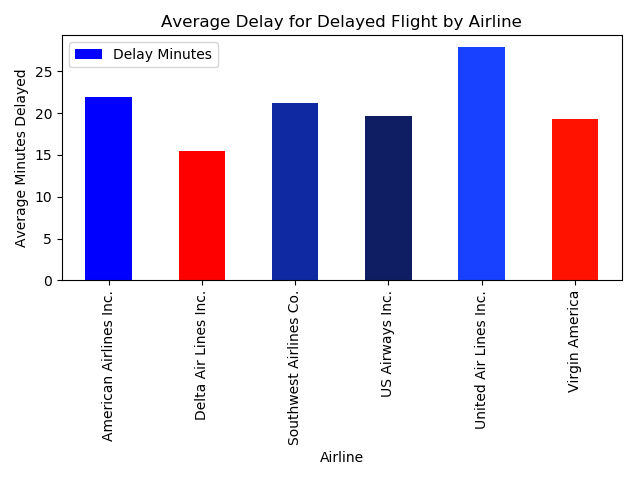

In [15]:
%matplotlib notebook
avg_delays6_plot = avg_delay6_df.plot.bar(y='avg_delay_per_flight', rot=0,color=['blue', 'red', '#0F29A2', '#0F1E62', '#1841FF','#FF1300'])
plt.xticks(rotation='vertical')
plt.title("Average Delay for Delayed Flight by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Minutes Delayed")
L=plt.legend()
L.get_texts()[0].set_text('Delay Minutes')
plt.tight_layout()
plt.savefig("Images/avg_delay6.png")
plt.show()

In [26]:
#### on time and delay percent #######
delays_df_2015
on_time_df = delays_df_2015[['year', ' month','carrier','carrier_name','airport', 'airport_name','arr_flights','arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'num_total_delays', 'percent_on_time' ]]
on_time_df["percent_on_time"] = pd.to_numeric(on_time_df.percent_on_time, errors='coerce')  #convert percent on time to float
on_time_df_pivot = pd.pivot_table(on_time_df, values="percent_on_time", index=["carrier_name"], aggfunc=np.mean)
on_time_df_pivot
on_time_df_pivot_percent =  (100. * on_time_df_pivot.round(3))
on_time_df_pivot_percent


C:\Users\ZLeisure\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,percent_on_time
carrier_name,
Alaska Airlines Inc.,79.2
American Airlines Inc.,71.8
Delta Air Lines Inc.,79.3
Envoy Air,70.4
ExpressJet Airlines Inc.,72.0
Frontier Airlines Inc.,68.2
Hawaiian Airlines Inc.,77.2
JetBlue Airways,70.0
SkyWest Airlines Inc.,73.4


<IPython.core.display.Javascript object>


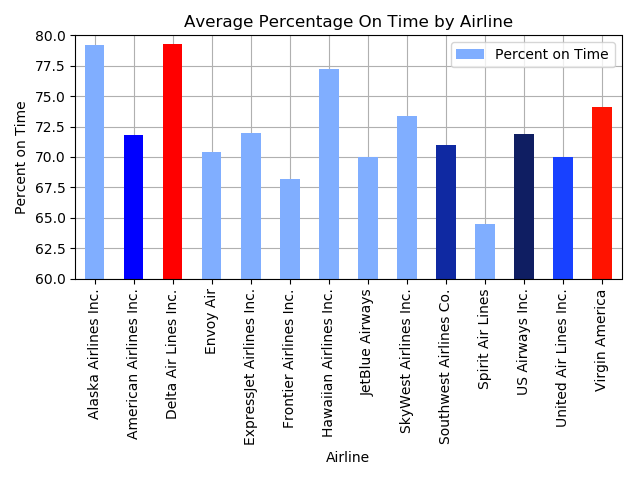

In [35]:
%matplotlib notebook
percent_on_time = on_time_df_pivot_percent.plot.bar(y='percent_on_time', rot=0, color=['#80AEFF','blue', 'red', '#80AEFF','#80AEFF', '#80AEFF','#80AEFF', '#80AEFF','#80AEFF','#0F29A2', '#80AEFF','#0F1E62', '#1841FF','#FF1300'])
plt.xticks(rotation='vertical')
#plt.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
plt.title("Average Percentage On Time by Airline")
plt.xlabel("Airline")
plt.ylabel("Percent on Time")
plt.ylim((60,80))
plt.grid()
percent_on_time.set_axisbelow(True)
L=plt.legend()
L.get_texts()[0].set_text('Percent on Time')
plt.tight_layout()
plt.savefig("Images/per_on_time_all.png")
plt.show()

In [37]:
on_time_df_pivot_percent
on_time_6 = on_time_df_pivot_percent.reset_index()
on_time_6 = on_time_df_pivot_percent.iloc[[1,2,9,11,12,13]]
on_time_6_df = pd.DataFrame(one_time_6)
on_time_6_df

,percent_on_time
carrier_name,
American Airlines Inc.,71.8
Delta Air Lines Inc.,79.3
Southwest Airlines Co.,71.0
US Airways Inc.,71.9
United Air Lines Inc.,70.0
Virgin America,74.1


<IPython.core.display.Javascript object>


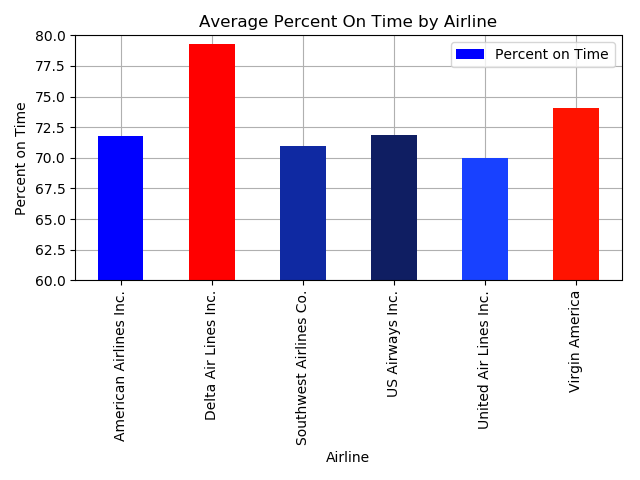

In [40]:
%matplotlib notebook
on_time_6_df_plot = on_time_6_df.plot.bar(y='percent_on_time', rot=0,color=['blue', 'red', '#0F29A2', '#0F1E62', '#1841FF','#FF1300'])
plt.xticks(rotation='vertical')
plt.title("Average Percent On Time by Airline")
plt.xlabel("Airline")
plt.ylabel("Percent on Time")
plt.ylim((60,80))
plt.grid()
on_time_6_df_plot.set_axisbelow(True)
L=plt.legend()
L.get_texts()[0].set_text('Percent on Time')
plt.tight_layout()
plt.savefig("Images/per_on_time_6.png")
plt.show()

In [94]:
#############  LARGEST AIRLINES (passengers & passenger miles)  ###########
#############  
largest_airlines = "Largest_Airlines_2015.csv"
largest_airlines_pd = pd.read_csv(largest_airlines)
largest_airlines_df = pd.DataFrame(largest_airlines_pd)
largest_airlines_df.columns = ['passengers', 'freight','mail','passenger_miles', 'carrier_name']
largest_airlines_df2 = largest_airlines_df[['passengers','passenger_miles', 'carrier_name']]
largest_airlines_df2.head()
asd = largest_airlines_df2[:10]
asd

,passengers,passenger_miles,carrier_name
0,144637180,1.166270e+11,Southwest Airlines Co. Total
1,137916298,1.861410e+11,Delta Air Lines Inc. Total
2,118541411,1.668690e+11,American Airlines Inc. Total
3,95028877,1.825090e+11,United Air Lines Inc. Total
4,35130683,4.172626e+10,JetBlue Airways Total
5,30078314,1.696540e+10,SkyWest Airlines Inc. Total
6,28269616,3.233075e+10,US Airways Inc. Total
7,26002874,1.268319e+10,ExpressJet Airlines Inc. Total
8,22868140,3.030128e+10,Alaska Airlines Inc. Total
9,17629033,1.794402e+10,Spirit Air Lines Total


<IPython.core.display.Javascript object>


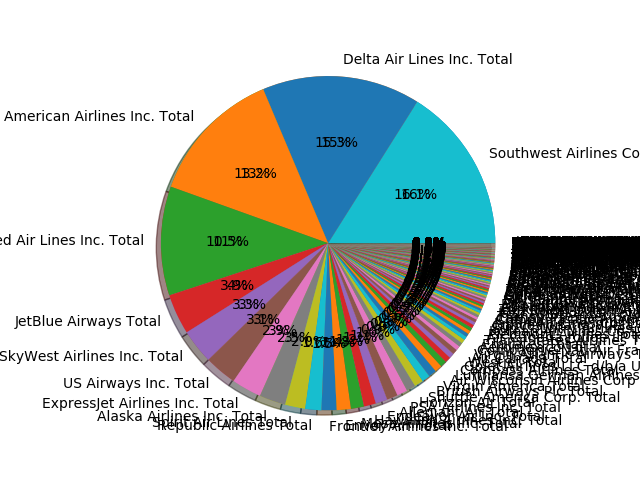

In [96]:
# # Pie chart, where the slices will be ordered and plotted counter-clockwise:
# labels = largest_airlines_df2['carrier_name']
# sizes = largest_airlines_df2['passengers']
# #explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
#         shadow=True)
# #ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# def autopct_more_than_1(pct):
#     return ('%1.f%%' % pct) if pct > 2 else ''
# normsizes = sizes/sizes.sum()*100
# p,t,a = ax1.pie(sizes.values, autopct=autopct_more_than_1)
# ax1.axis('equal') 
# h,l = zip(*[(h,lab) for h,lab,i in zip(p,sizes.index.values,normsizes.values) if i > 2])

# #ax1.legend(h, l,loc="best", bbox_to_anchor=(1,1))


# plt.show()

# labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
# sizes = [15, 30, 45, 10]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()


In [107]:
# import plotly.graph_objects as go

# labels = largest_airlines_df2['carrier_name']
# values = largest_airlines_df2['passengers']

# labels_20 = labels[:19]
# values_20 = values[:19]

# labels_20_259 = labels[20:259]
# values_20_259 = values[20:259]





20     7068903
21     6993269
22     6312190
23     5529920
24     4954755
25     4378275
26     4340453
27     3875015
28     3590723
29     3574270
30     3119687
31     3012129
32     2979313
33     2930579
34     2904775
35     2655328
36     2604874
37     2230792
38     2134182
39     2061716
40     2024429
41     1816652
42     1765881
43     1681191
44     1621374
45     1574036
46     1565946
47     1464531
48     1431283
49     1373997
        ...   
229        231
230        220
231        218
232        215
233        208
234        169
235        153
236        141
237        138
238        130
239        114
240        105
241         95
242         88
243         87
244         84
245         75
246         67
247         51
248         48
249         48
250         39
251         38
252         35
253         25
254         24
255         19
256         11
257         10
258          4
Name: passengers, Length: 239, dtype: int64

In [109]:
# fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
# fig.update_layout(showlegend=False)

# fig.show()
# # fig = go.Figure()

# fig.add_trace(go.Pie(
#     x=labels,
#     y=values,
#     showlegend=False
# ))

# fig.add_trace(go.Pie(
#     x=labels_20,
#     y=values_20,
# ))

# fig.update_layout(showlegend=True)
# fig.show()
# labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
# values = [4500, 2500, 1053, 500]
# (data=[go.Pie(labels=labels, values=values)])
# fig.update_layout(legend=dict(x=-2, y=0))

# import plotly.graph_objects as go

# labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
# values = [4500, 2500, 1053, 500]

# fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
# fig.show()